# 한글폰트 설치

In [142]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

# 득점 상관관계 분석

[133 126 128 144]
      타율    장타율    출루율    OPS  득점권타율   대타타율     경기당득점     경기당안타    경기당2루타  \
0  0.280  0.425  0.365  0.790  0.288  0.244  5.398496  9.511278  1.857143   
1  0.278  0.428  0.353  0.781  0.272  0.225  5.135338  9.496241  1.661654   
2  0.277  0.447  0.360  0.807  0.267  0.223  5.556391  9.488722  1.834586   
3  0.276  0.421  0.359  0.780  0.278  0.163  5.503759  9.518797  1.661654   
4  0.276  0.391  0.363  0.754  0.280  0.263  5.030075  9.375940  1.646617   

     경기당3루타     경기당홈런      경기당루타     경기당타점   경기당희생번트  경기당희생플라이     경기당볼넷  \
0  0.180451  0.909774  14.458647  5.045113  0.616541  0.451128  4.398496   
1  0.127820  1.067669  14.616541  4.789474  0.383459  0.323308  3.736842   
2  0.157895  1.218045  15.293233  5.225564  0.518797  0.315789  3.909774   
3  0.195489  0.977444  14.503759  5.172932  0.406015  0.345865  4.210526   
4  0.180451  0.639098  13.300752  4.736842  0.857143  0.308271  4.436090   

    경기당고의사구     경기당사구     경기당삼진    경기당병살타  
0  0.293233  0.451

<Axes: xlabel='경기당득점', ylabel='대타타율'>

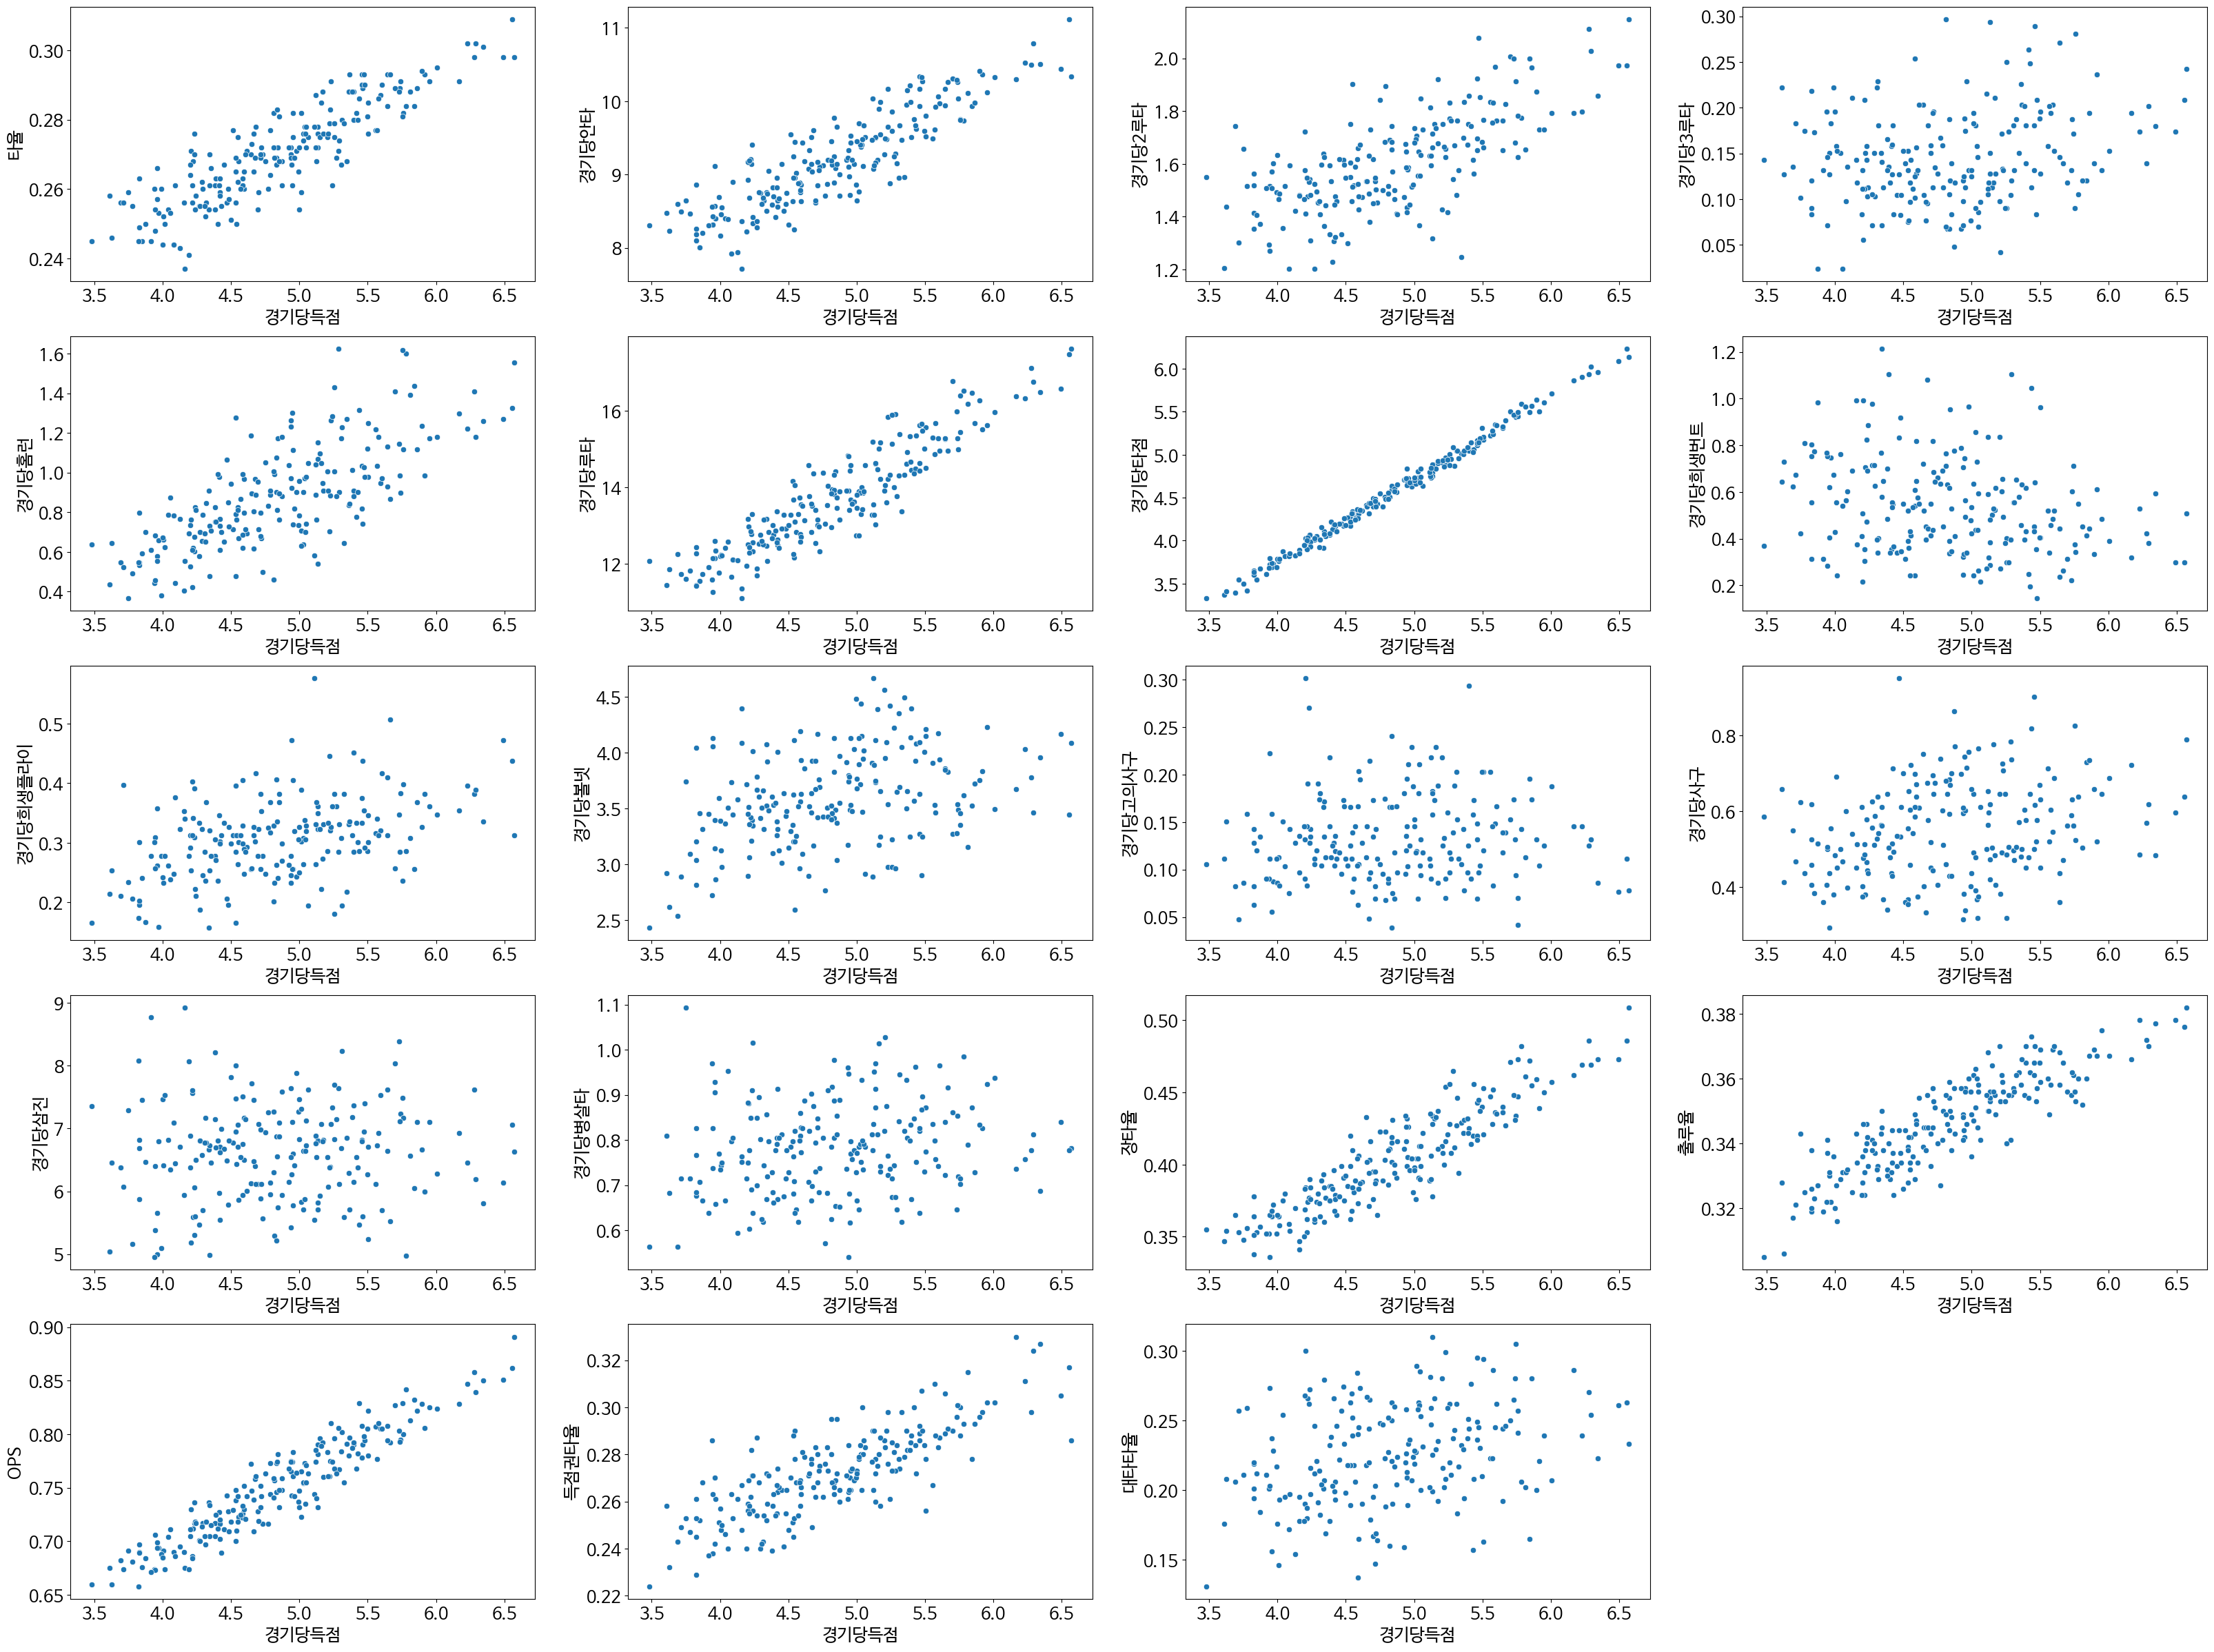

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#타자 데이터 불러오기
adf1 = pd.read_csv('kbo_team_hitter1.csv',encoding='CP949')
adf2 = pd.read_csv('kbo_team_hitter2.csv',encoding='CP949')
adf3 = pd.merge(adf1,adf2,how='inner',on=['팀명','Year'])

#데이터 전처리
adf3.drop(['Unnamed: 0_x','Unnamed: 0_y','순위_x','순위_y','AVG_y','MH'],axis=1,inplace=True)
adf3.columns=['팀명','타율','경기수','타석','타수','득점','안타','2루타','3루타','홈런','루타','타점','희생번트','희생플라이','연도','볼넷','고의사구','사구','삼진','병살타','장타율','출루율','OPS','득점권타율','대타타율']
print(adf3['경기수'].unique())

adf3['경기당득점'] = adf3['득점'] / adf3['경기수']
adf3['경기당안타'] = adf3['안타'] / adf3['경기수']
adf3['경기당2루타'] = adf3['2루타'] / adf3['경기수']
adf3['경기당3루타'] = adf3['3루타'] / adf3['경기수']
adf3['경기당홈런'] = adf3['홈런'] / adf3['경기수']
adf3['경기당루타'] = adf3['루타'] / adf3['경기수']
adf3['경기당타점'] = adf3['타점'] / adf3['경기수']
adf3['경기당희생번트'] = adf3['희생번트'] / adf3['경기수']
adf3['경기당희생플라이'] = adf3['희생플라이'] / adf3['경기수']
adf3['경기당볼넷'] = adf3['볼넷'] / adf3['경기수']
adf3['경기당고의사구'] = adf3['고의사구'] / adf3['경기수']
adf3['경기당사구'] = adf3['사구'] / adf3['경기수']
adf3['경기당삼진'] = adf3['삼진'] / adf3['경기수']
adf3['경기당병살타'] = adf3['병살타'] / adf3['경기수']

adf3.drop(['팀명','경기수','타석','타수','득점','안타','2루타','3루타','홈런','루타','타점','희생번트','희생플라이','연도','볼넷','고의사구','사구','삼진','병살타'],axis=1,inplace=True)
print(adf3.head())

#scatterplot 그리기
fig = plt.figure(figsize=(40,30))
for i in range(1,20):
     globals()['ax'+str(i)] = fig.add_subplot(5,4,i)

sns.scatterplot(data=adf3,x='경기당득점',y='타율',ax=ax1)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당안타',ax=ax2)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당2루타',ax=ax3)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당3루타',ax=ax4)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당홈런',ax=ax5)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당루타',ax=ax6)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당타점',ax=ax7)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당희생번트',ax=ax8)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당희생플라이',ax=ax9)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당볼넷',ax=ax10)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당고의사구',ax=ax11)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당사구',ax=ax12)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당삼진',ax=ax13)
sns.scatterplot(data=adf3,x='경기당득점',y='경기당병살타',ax=ax14)
sns.scatterplot(data=adf3,x='경기당득점',y='장타율',ax=ax15)
sns.scatterplot(data=adf3,x='경기당득점',y='출루율',ax=ax16)
sns.scatterplot(data=adf3,x='경기당득점',y='OPS',ax=ax17)
sns.scatterplot(data=adf3,x='경기당득점',y='득점권타율',ax=ax18)
sns.scatterplot(data=adf3,x='경기당득점',y='대타타율',ax=ax19)


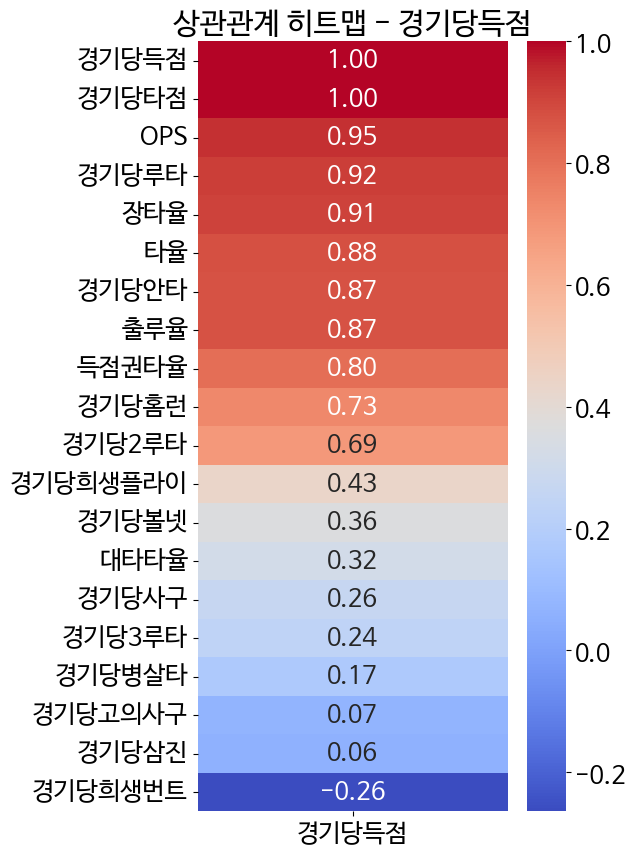

In [3]:
#득점 상관관계 히트맵 그리기
column = adf3.corrwith(adf3['경기당득점'])
df = pd.DataFrame(column, columns=['경기당득점'])
df = df.sort_values(by='경기당득점', ascending=False)
plt.figure(figsize=(5,10))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'상관관계 히트맵 - 경기당득점')
plt.show()

# 실점 상관관계 분석

   평균자책점  이닝당출루허용률   피안타율     경기당실점     경기당승리     경기당패배    경기당세이브     경기당홀드  \
0   4.34      1.51  0.277  4.721805  0.541353  0.428571  0.293233  0.172932   
1   4.38      1.41  0.259  4.812030  0.451128  0.533835  0.248120  0.165414   
2   4.39      1.48  0.265  4.842105  0.609023  0.390977  0.323308  0.150376   
3   4.68      1.50  0.276  5.037594  0.443609  0.526316  0.248120  0.210526   
4   4.82      1.54  0.280  5.511278  0.458647  0.511278  0.187970  0.248120   

     경기당피안타    경기당피홈런  ...     경기당사구     경기당삼진  경기당퀄리티스타트  경기당블론세이브   경기당피2루타  \
0  9.398496  0.736842  ...  0.406015  5.691729   0.421053       0.0  1.646617   
1  8.631579  1.165414  ...  0.488722  6.827068   0.458647       0.0  1.631579   
2  8.984962  0.992481  ...  0.458647  6.345865   0.383459       0.0  1.556391   
3  9.308271  0.962406  ...  0.458647  5.939850   0.323308       0.0  1.887218   
4  9.684211  1.067669  ...  0.496241  6.112782   0.368421       0.0  1.789474   

    경기당피3루타  경기당피희생번트  경기당피희생플라이   경기당

<Axes: xlabel='경기당실점', ylabel='경기당폭투'>

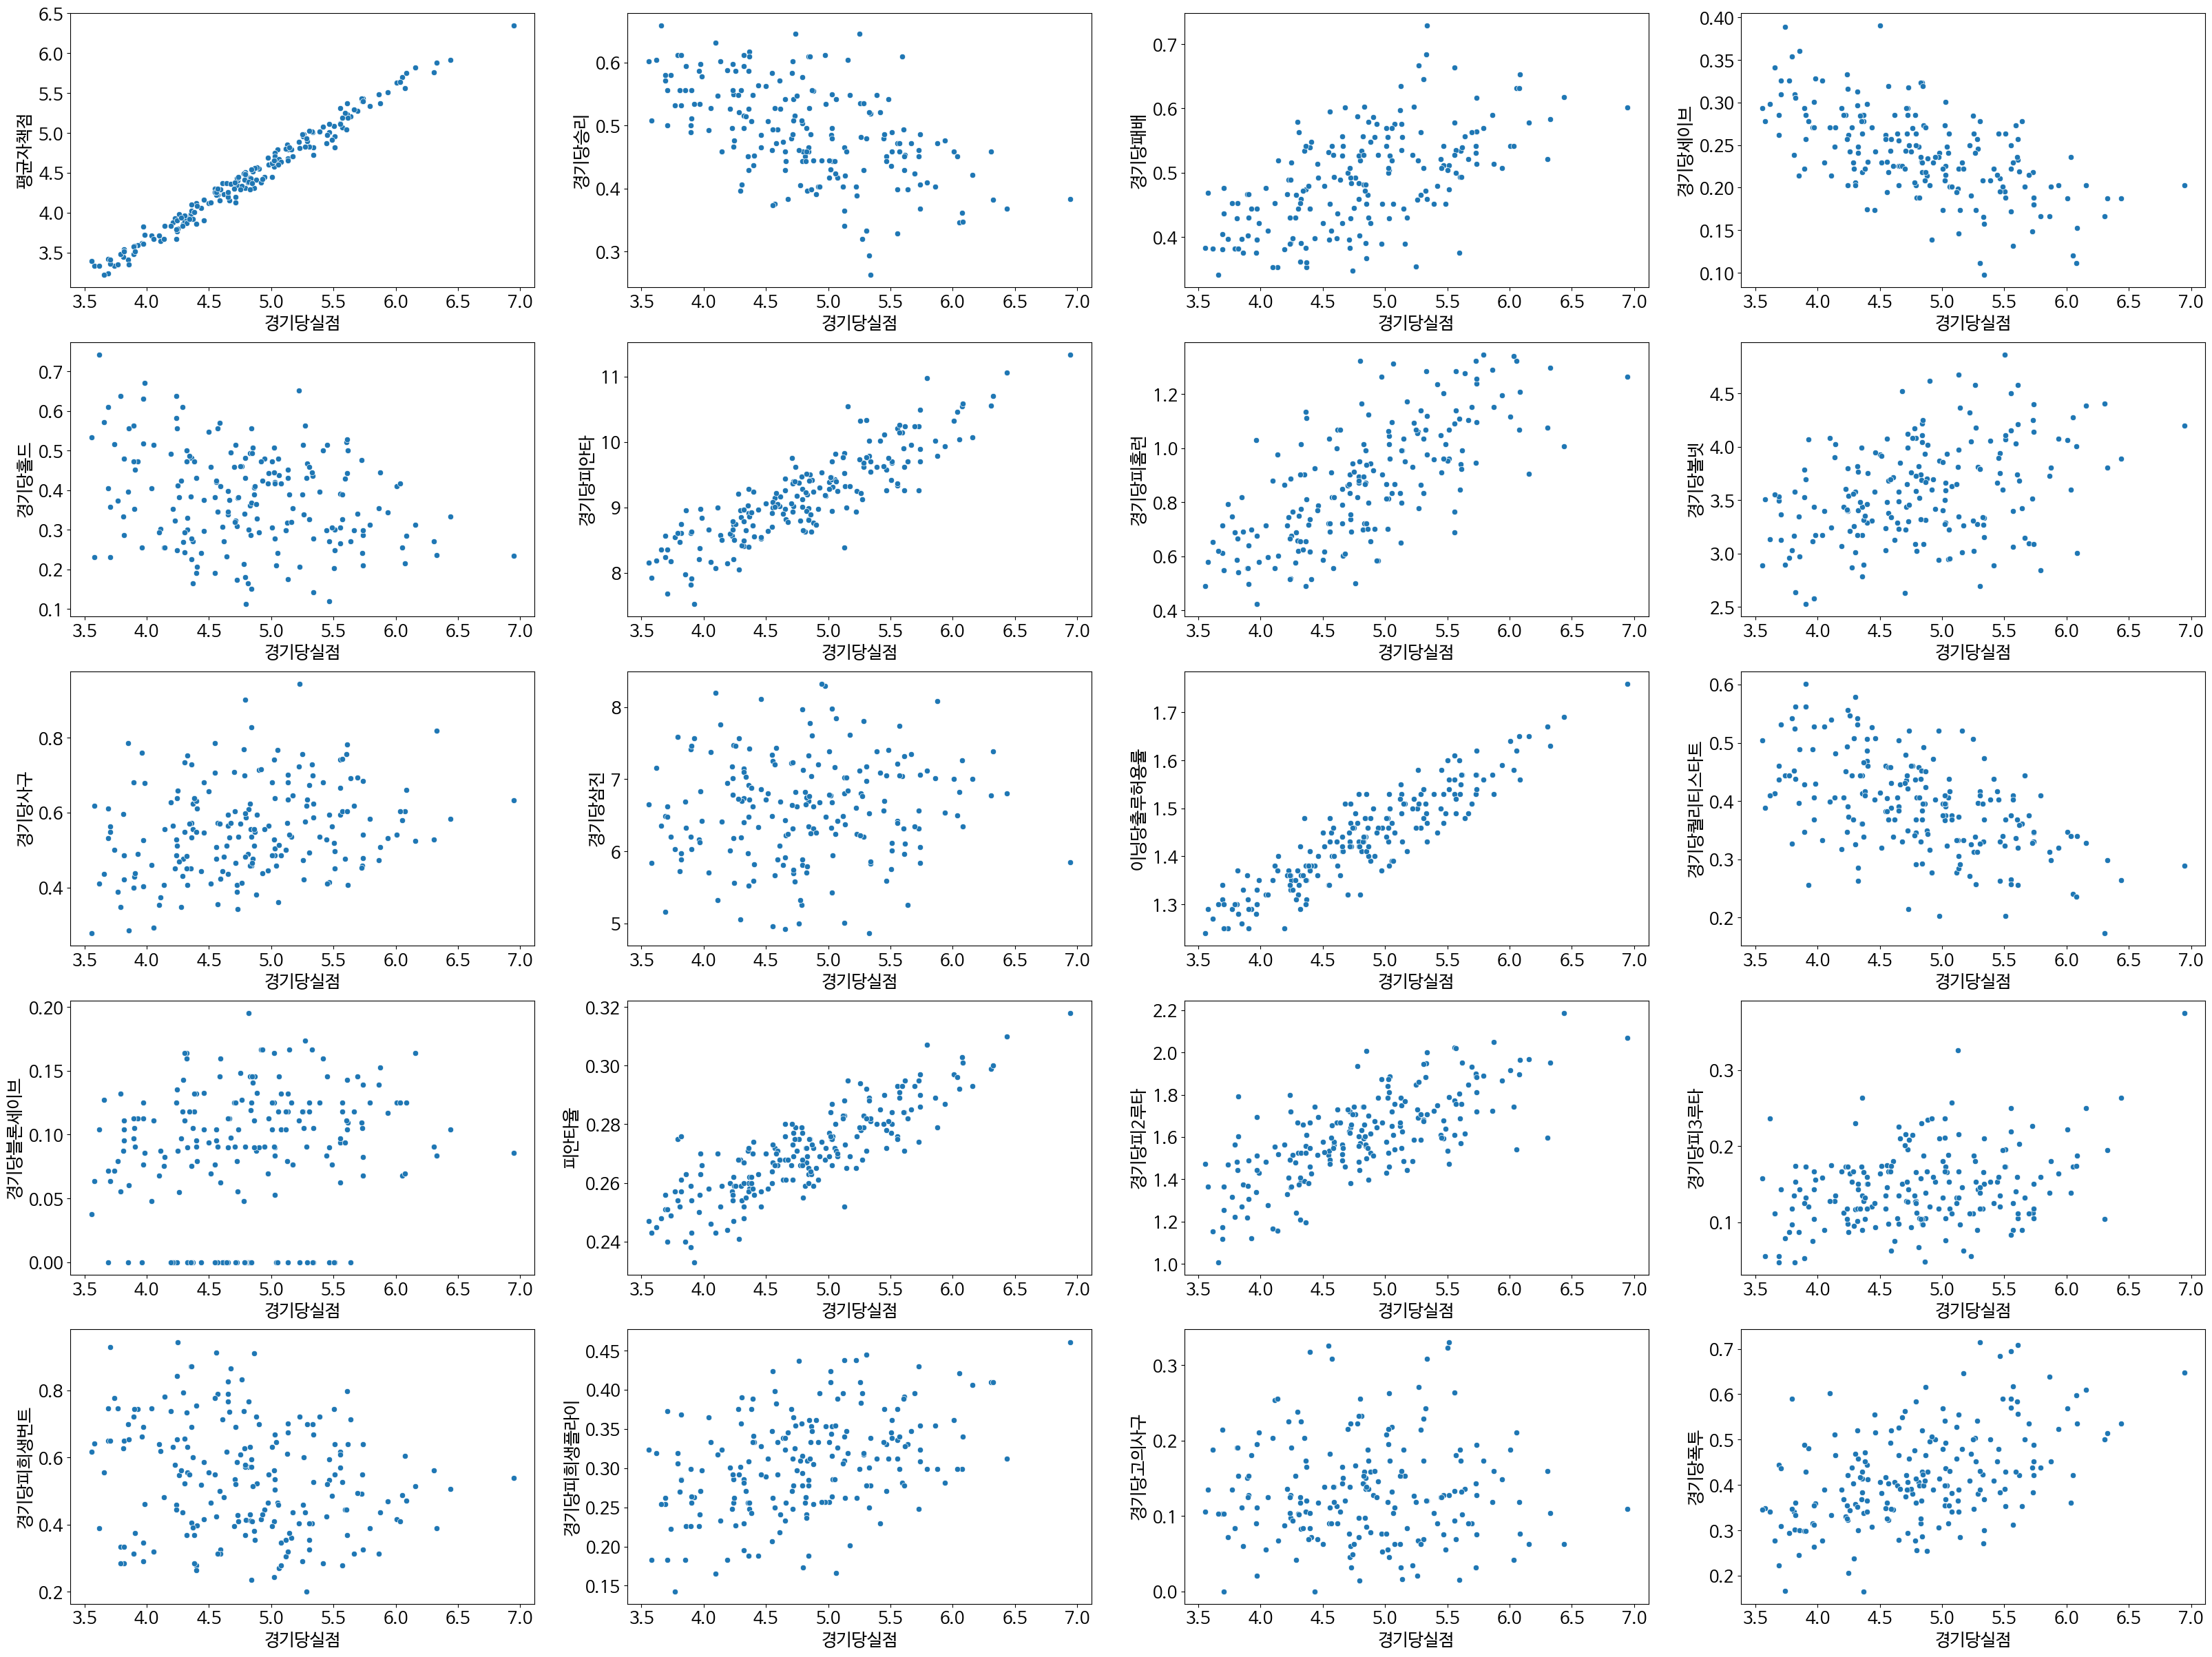

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#투수 데이터 불러오기
bdf1 = pd.read_csv('kbo_team_pitcher1.csv',encoding='CP949')
bdf2 = pd.read_csv('kbo_team_pitcher2.csv',encoding='CP949')
bdf3 = pd.merge(bdf1,bdf2,how='inner',on=['팀명','Year'])

#데이터 전처리
bdf3.drop(['Unnamed: 0_x','Unnamed: 0_y','순위_x','순위_y','ERA_y','WPCT','IP','CG','SHO','TBF','NP','BK','ER'],axis=1,inplace=True)
bdf3.columns=['팀명','평균자책점','경기수','승리','패배','세이브','홀드','피안타','피홈런','볼넷','사구','삼진','실점','이닝당출루허용률',
              '연도','퀄리티스타트','블론세이브','피안타율','피2루타','피3루타','피희생번트','피희생플라이','고의사구','폭투']

bdf3['경기당실점'] = bdf3['실점'] / bdf3['경기수']
bdf3['경기당승리'] = bdf3['승리'] / bdf3['경기수']
bdf3['경기당패배'] = bdf3['패배'] / bdf3['경기수']
bdf3['경기당세이브'] = bdf3['세이브'] / bdf3['경기수']
bdf3['경기당홀드'] = bdf3['홀드'] / bdf3['경기수']
bdf3['경기당피안타'] = bdf3['피안타'] / bdf3['경기수']
bdf3['경기당피홈런'] = bdf3['피홈런'] / bdf3['경기수']
bdf3['경기당볼넷'] = bdf3['볼넷'] / bdf3['경기수']
bdf3['경기당사구'] = bdf3['사구'] / bdf3['경기수']
bdf3['경기당삼진'] = bdf3['삼진'] / bdf3['경기수']
bdf3['경기당퀄리티스타트'] = bdf3['퀄리티스타트'] / bdf3['경기수']
bdf3['경기당블론세이브'] = bdf3['블론세이브'] / bdf3['경기수']
bdf3['경기당피2루타'] = bdf3['피2루타'] / bdf3['경기수']
bdf3['경기당피3루타'] = bdf3['피3루타'] / bdf3['경기수']
bdf3['경기당피희생번트'] = bdf3['피희생번트'] / bdf3['경기수']
bdf3['경기당피희생플라이'] = bdf3['피희생플라이'] / bdf3['경기수']
bdf3['경기당고의사구'] = bdf3['고의사구'] / bdf3['경기수']
bdf3['경기당폭투'] = bdf3['폭투'] / bdf3['경기수']

bdf3.drop(['팀명','경기수','실점','승리','패배','세이브','홀드','피안타','피홈런','볼넷','사구','삼진',
           '연도','퀄리티스타트','블론세이브','피2루타','피3루타','피희생번트','피희생플라이','고의사구','폭투'],axis=1,inplace=True)
print(bdf3.head())

#scatterplot 그리기
fig = plt.figure(figsize=(40,30))
for i in range(1,21):
     globals()['bx'+str(i)] = fig.add_subplot(5,4,i)

sns.scatterplot(data=bdf3,x='경기당실점',y='평균자책점',ax=bx1)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당승리',ax=bx2)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당패배',ax=bx3)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당세이브',ax=bx4)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당홀드',ax=bx5)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당피안타',ax=bx6)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당피홈런',ax=bx7)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당볼넷',ax=bx8)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당사구',ax=bx9)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당삼진',ax=bx10)
sns.scatterplot(data=bdf3,x='경기당실점',y='이닝당출루허용률',ax=bx11)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당퀄리티스타트',ax=bx12)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당블론세이브',ax=bx13)
sns.scatterplot(data=bdf3,x='경기당실점',y='피안타율',ax=bx14)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당피2루타',ax=bx15)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당피3루타',ax=bx16)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당피희생번트',ax=bx17)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당피희생플라이',ax=bx18)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당고의사구',ax=bx19)
sns.scatterplot(data=bdf3,x='경기당실점',y='경기당폭투',ax=bx20)

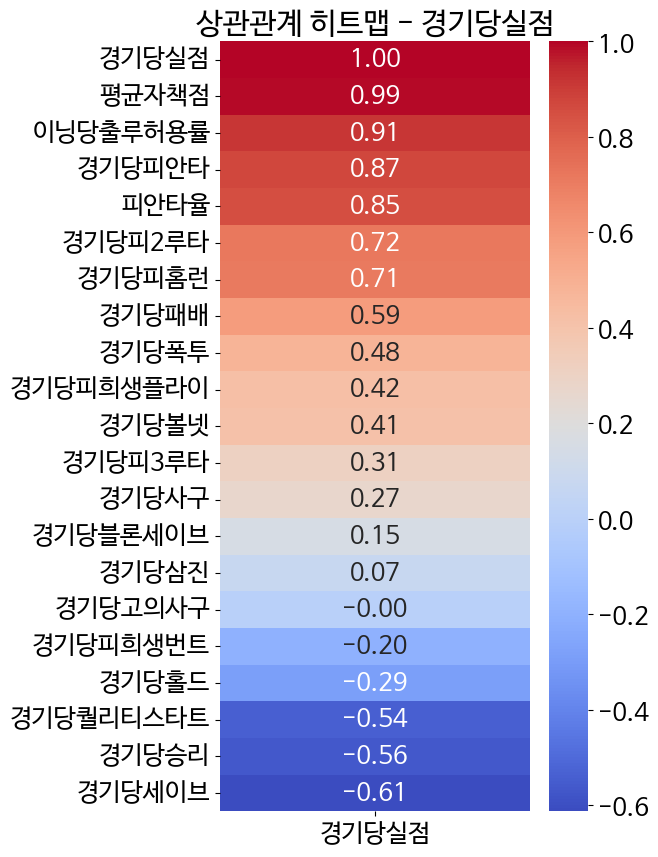

In [5]:
#실점 상관관계 히트맵 그리기
column = bdf3.corrwith(bdf3['경기당실점'])
df2 = pd.DataFrame(column, columns=['경기당실점'])
df2 = df2.sort_values(by='경기당실점', ascending=False)
plt.figure(figsize=(5,10))
sns.heatmap(df2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'상관관계 히트맵 - 경기당실점')
plt.show()

# 포스트시즌 진출 예측

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

#팀들의 데이터 불러오기, 데이터 전처리
cdf1 = pd.read_csv('kbo_team_hitter1.csv',encoding='CP949')
cdf2 = pd.read_csv('kbo_team_hitter2.csv',encoding='CP949')
cdf3 = pd.merge(cdf1[['팀명','Year','AVG']],cdf2[['팀명','Year','OPS','RISP','PH-BA']],how='inner',on=['팀명','Year'])
cdf4 = pd.read_csv('kbo_team_pitcher1.csv',encoding='CP949')
cdf5 = pd.read_csv('kbo_team_pitcher2.csv',encoding='CP949')
cdf6 = pd.merge(cdf4[['팀명','Year','ERA','WHIP']],cdf5[['팀명','Year','AVG']],how='inner',on=['팀명','Year'])
cdf7 = pd.read_csv('kbo_team_defense.csv',encoding='CP949')
cdf8 = pd.read_csv('kbo_team_runner.csv',encoding='CP949')
cdf9 = pd.merge(cdf7[['팀명','Year','FPCT']],cdf8[['팀명','Year','SB%']],how='inner',on=['팀명','Year'])
cdf10 = pd.merge(cdf3,cdf6,how='inner',on=['팀명','Year'])
cdf11 = pd.merge(cdf10,cdf9,how='inner',on=['팀명','Year'])
cdf12 = pd.read_csv('kbo_team_ranking.csv',encoding='CP949')
cdf13 = pd.merge(cdf11,cdf12[['팀명','Year','순위']],how='inner',on=['팀명','Year'])
cdf13.sort_values(by=['Year','순위'],inplace=True)
cdf13.reset_index(drop=True,inplace=True)
cdf13.columns = ['팀명','연도','타율','OPS','득점권타율','대타타율','평균자책점','이닝당출루허용률','피안타율','수비율','도루성공률','순위']

mask1 = cdf13.연도<=2022
cdf13 = cdf13.loc[mask1,:]

def winner(rank):
  if rank == 1:
    return 1
  else:
    return 0

def post(rank,year):
  if year<=2014:
    if rank <= 4:
      return 1
    else:
      return 0
  else:
    if rank<=5:
      return 1
    else:
      return 0

cdf13['winner'] = cdf13.apply(lambda x:winner(x['순위']),axis=1)
cdf13['post'] = cdf13.apply(lambda x:post(x['순위'],x['연도']),axis=1)
print(cdf13.head(10))

    팀명    연도     타율    OPS  득점권타율   대타타율  평균자책점  이닝당출루허용률   피안타율    수비율  \
0   두산  2001  0.276  0.780  0.278  0.163   4.96      1.56  0.284  0.979   
1   삼성  2001  0.277  0.807  0.267  0.223   4.39      1.48  0.265  0.984   
2   현대  2001  0.268  0.791  0.279  0.232   4.34      1.51  0.277  0.978   
3   한화  2001  0.275  0.783  0.265  0.233   4.82      1.54  0.280  0.977   
4  KIA  2001  0.278  0.781  0.272  0.225   5.01      1.47  0.272  0.979   
5   LG  2001  0.276  0.754  0.280  0.263   5.09      1.60  0.277  0.980   
6   SK  2001  0.260  0.728  0.255  0.274   4.38      1.41  0.259  0.981   
7   롯데  2001  0.280  0.790  0.288  0.244   4.68      1.50  0.276  0.981   
8   삼성  2002  0.284  0.832  0.278  0.165   3.92      1.31  0.262  0.983   
9   LG  2002  0.261  0.717  0.258  0.178   3.93      1.36  0.252  0.982   

   도루성공률  순위  winner  post  
0   79.5   1       1     1  
1   62.4   2       0     1  
2   64.3   3       0     1  
3   67.5   4       0     1  
4   59.4   5       0     0  


학습세트의 정확도: 0.8896551724137931
테스트세트의 정확도: 0.7959183673469388
포스트시즌 진출 확률
LG 99.958%
KT 88.941%
SSG 13.115%
NC 98.477%
두산 16.634%
KIA 98.946%
롯데 48.727%
삼성 1.011%
한화 0.272%
키움 0.702%


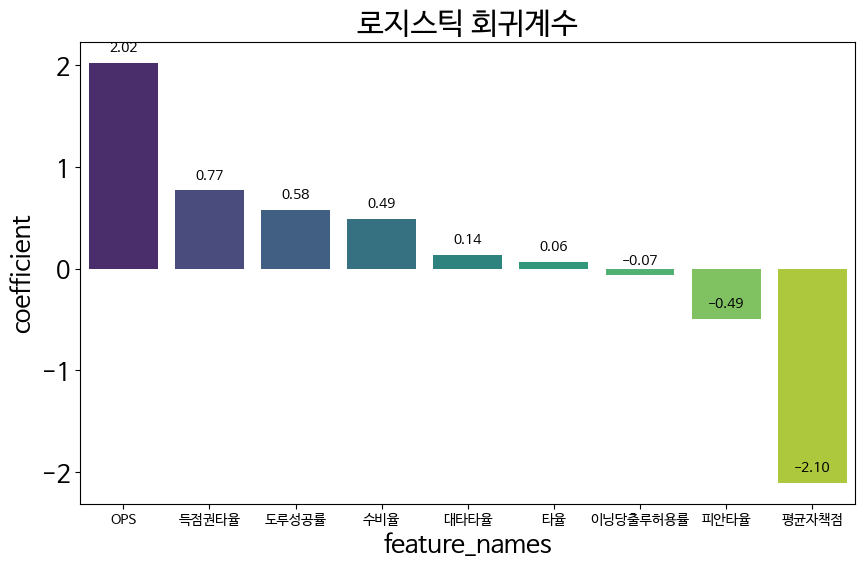

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#학습세트와 평가세트 분리
x = cdf13[['타율','OPS','득점권타율','대타타율','평균자책점','이닝당출루허용률','피안타율','수비율','도루성공률']]
y = cdf13['post']
team = ['LG','KT','SSG','NC','두산','KIA','롯데','삼성','한화','키움']
x_train, x_test, y_train, y_test = train_test_split(x,y)

#데이터 정규화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#모델 생성 및 평가하기(로지스틱 회귀분석)
model = LogisticRegression()
model.fit(x_train,y_train)
print('학습세트의 정확도:',model.score(x_train,y_train))
print('테스트세트의 정확도:',model.score(x_test,y_test))
coef = pd.DataFrame({"feature_names":x.columns, "coefficient":model.coef_[0]})
coef.sort_values(by=['coefficient'],inplace=True,ascending=False)

#예측하기
LG = np.array([0.279,0.755,0.298,0.217,3.67,1.36,0.256,0.976,62.2])
KT = np.array([0.265,0.709,0.276,0.244,3.94,1.35,0.268,0.981,74.4])
SSG = np.array([0.260,0.725,0.254,0.206,4.37,1.53,0.275,0.978,77.4])
NC = np.array([0.270,0.732,0.268,0.147,3.83,1.31,0.241,0.976,70.7])
두산 = np.array([0.255,0.705,0.242,0.214,3.92,1.36,0.255,0.978,13.5])
KIA = np.array([0.276,0.735,0.300,0.285,4.13,1.42,0.258,0.981,78.2])
롯데 = np.array([0.265,0.700,0.288,0.263,4.15,1.46,0.270,0.981,70.6])
삼성 = np.array([0.263,0.702,0.267,0.199,4.60,1.47,0.280,0.981,74.6])
한화 = np.array([0.241,0.674,0.240,0.178,4.38,1.40,0.261,0.980,75.3])
키움 = np.array([0.261,0.684,0.258,0.180,4.42,1.45,0.269,0.979,83.1])

testdata = np.array([LG,KT,SSG,NC,두산,KIA,롯데,삼성,한화,키움])
testdata = scaler.fit_transform(testdata)
result = model.predict_proba(testdata)
result = [np.array2string(row, separator=' ').split() for row in result]

print('포스트시즌 진출 확률')
arr_probability=[]
for i in range(0,10):
  probability = float(result[i][1][:-1]) * 100
  print(f'{team[i]} {probability:.3f}%')
  arr_probability.append(probability)

#로지스틱 회귀계수 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=coef, x='feature_names', y='coefficient', palette='viridis')
ax.tick_params(axis='x', labelsize=10)
plt.title('로지스틱 회귀계수')

#각 막대 위에 값을 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

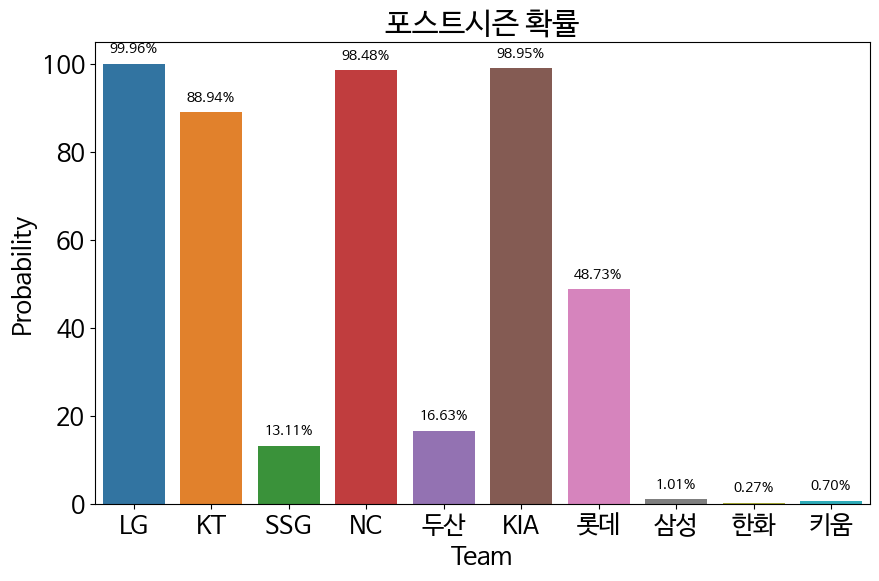

In [8]:
#포스트시즌 진출 확률 그래프 그리기
df123 = pd.DataFrame({'Team':team,'Probability':arr_probability})
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df123, x='Team', y='Probability')
plt.title('포스트시즌 확률')

#각 막대 위에 값을 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

# 우승 예측

학습세트의 정확도: 0.896551724137931
테스트세트의 정확도: 0.8775510204081632
우승 확률
LG 79.326%
KT 7.076%
SSG 2.407%
NC 49.493%
두산 3.005%
KIA 26.097%
롯데 2.491%
삼성 0.265%
한화 0.280%
키움 0.301%


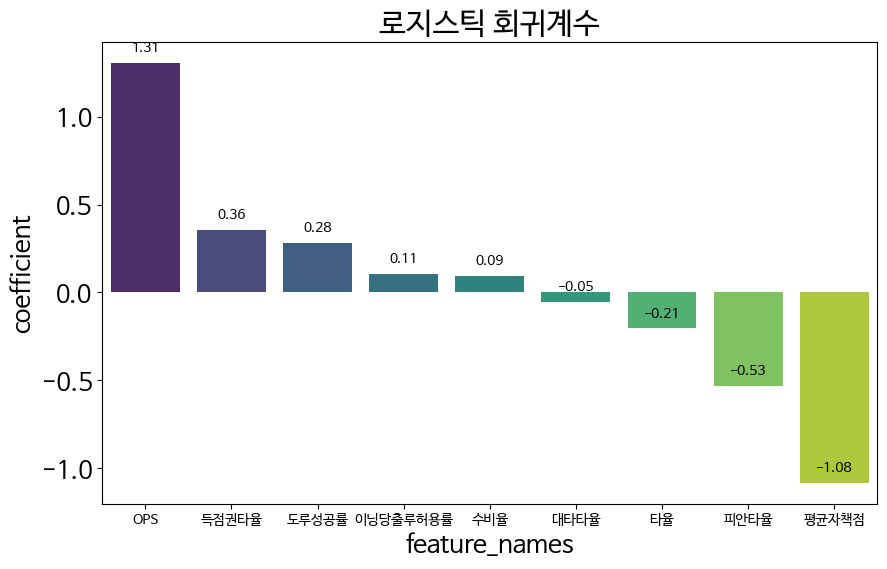

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#학습세트와 평가세트 분리
x = cdf13[['타율','OPS','득점권타율','대타타율','평균자책점','이닝당출루허용률','피안타율','수비율','도루성공률']]
y = cdf13['winner']
team = ['LG','KT','SSG','NC','두산','KIA','롯데','삼성','한화','키움']
x_train, x_test, y_train, y_test = train_test_split(x,y)

#데이터 정규화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#모델 생성 및 평가하기(로지스틱 회귀분석)
model = LogisticRegression()
model.fit(x_train,y_train)
print('학습세트의 정확도:',model.score(x_train,y_train))
print('테스트세트의 정확도:',model.score(x_test,y_test))
coef = pd.DataFrame({"feature_names":x.columns, "coefficient":model.coef_[0]})
coef.sort_values(by=['coefficient'],inplace=True,ascending=False)

#예측하기
LG = np.array([0.279,0.755,0.298,0.217,3.67,1.36,0.256,0.976,62.2])
KT = np.array([0.265,0.709,0.276,0.244,3.94,1.35,0.268,0.981,74.4])
SSG = np.array([0.260,0.725,0.254,0.206,4.37,1.53,0.275,0.978,77.4])
NC = np.array([0.270,0.732,0.268,0.147,3.83,1.31,0.241,0.976,70.7])
두산 = np.array([0.255,0.705,0.242,0.214,3.92,1.36,0.255,0.978,13.5])
KIA = np.array([0.276,0.735,0.300,0.285,4.13,1.42,0.258,0.981,78.2])
롯데 = np.array([0.265,0.700,0.288,0.263,4.15,1.46,0.270,0.981,70.6])
삼성 = np.array([0.263,0.702,0.267,0.199,4.60,1.47,0.280,0.981,74.6])
한화 = np.array([0.241,0.674,0.240,0.178,4.38,1.40,0.261,0.980,75.3])
키움 = np.array([0.261,0.684,0.258,0.180,4.42,1.45,0.269,0.979,83.1])

testdata = np.array([LG,KT,SSG,NC,두산,KIA,롯데,삼성,한화,키움])
testdata = scaler.fit_transform(testdata)
result = model.predict_proba(testdata)
result = [np.array2string(row, separator=' ').split() for row in result]

print('우승 확률')
arr_probability=[]
for i in range(0,10):
  probability = float(result[i][1][:-1]) * 100
  print(f'{team[i]} {probability:.3f}%')
  arr_probability.append(probability)

#로지스틱 회귀계수 그래프 그리기
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=coef, x='feature_names', y='coefficient', palette='viridis')
ax.tick_params(axis='x', labelsize=10)
plt.title('로지스틱 회귀계수')

#각 막대 위에 값을 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

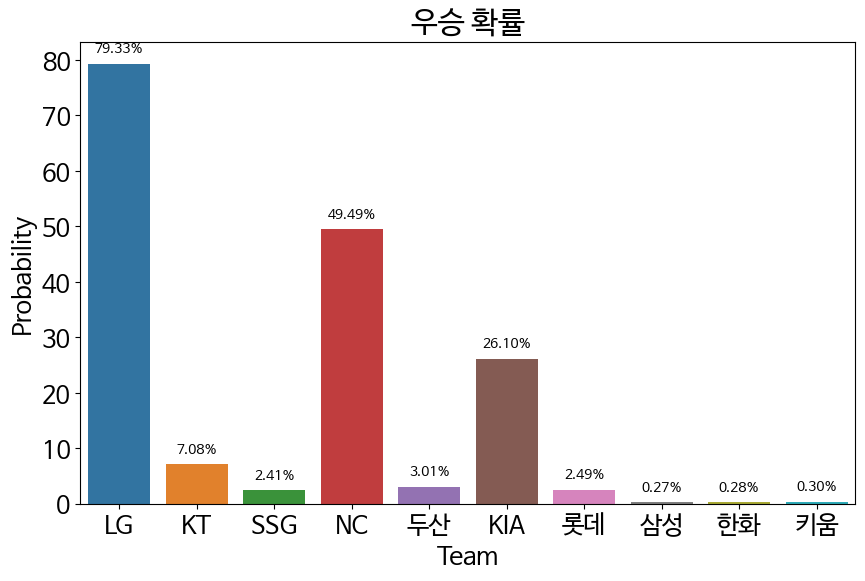

In [10]:
#우승 확률 그래프 그리기
df123 = pd.DataFrame({'Team':team,'Probability':arr_probability})
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df123, x='Team', y='Probability')
plt.title('우승 확률')

#각 막대 위에 값을 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()